# Advanced Classification Predict 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>


In [66]:
# Import libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import itertools

from copy import deepcopy
from tqdm import tqdm
import time
# tqdm.pandas()

# set plot style
sns.set()

from wordcloud import WordCloud 

import nltk
from nltk import TreebankWordTokenizer, SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string
import urllib

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')


[nltk_data] Error loading wordnet: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     self signed certificate in certificate chain
[nltk_data]     (_ssl.c:1125)>
[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     self signed certificate in certificate chain
[nltk_data]     (_ssl.c:1125)>
[nltk_data] Error loading omw-1.4: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     self signed certificate in certificate chain
[nltk_data]     (_ssl.c:1125)>


False

In [67]:
!pip install tqdm

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


In [68]:
# Load files
df_train= pd.read_csv('/Users/admin/Documents/Data Science/Explore/Advanced Classification/Advanced_Classification_Predict-student_data-2780/edsa-climate-change-belief-analysis-2022/train.csv')
df_test= pd.read_csv('/Users/admin/Documents/Data Science/Explore/Advanced Classification/Advanced_Classification_Predict-student_data-2780/edsa-climate-change-belief-analysis-2022/test.csv')
samplesubmission = pd.read_csv('/Users/admin/Documents/Data Science/Explore/Advanced Classification/Advanced_Classification_Predict-student_data-2780/edsa-climate-change-belief-analysis-2022/sample_submission.csv')




In [69]:
train = deepcopy(df_train)
test = deepcopy(df_test)

In [70]:
# Preview train dataset
train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [71]:
# Preview test dataset
test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


In [72]:
# Preview sample submission file
samplesubmission.head()

,tweetid,sentiment
0,169760,1
1,35326,1
2,224985,1
3,476263,1
4,872928,1


In [73]:
##nltk.download()

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [74]:
# Check size and shape of datasets
train.shape, test.shape

((15819, 3), (10546, 2))

The train dataset has 15819 rows (tweets) with 3 columns while the test dataset contains 10546 rows and 2 columns.

In [75]:
# The total number of classes in our dataset (train)
variable= list(train['sentiment'].unique())
variable

[1, 2, 0, -1]

In [76]:
#Replacing all numeric values with the appropriate labels, given by the dataset
#Function to lable our Sentiments
def sentimentLabel(score):
    """
    Classifies tweets as News, Pro, Neutral, or Anti based on their sentiment number
    
    Parameters:
    score: an integer (int64)
    
    returns:
    The word corresponding to the integer
    """
    if score == 2:
        return 'News'
    elif score == 1:
        return 'Pro'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Anti'
train['Analysis'] = train['sentiment'].apply(sentimentLabel) # Adding an Analysis column to the df dataframe
train.head()

,sentiment,message,tweetid,Analysis
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,Pro
1,1,It's not like we lack evidence of anthropogeni...,126103,Pro
2,2,RT @RawStory: Researchers say we have three ye...,698562,News
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,Pro
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,Pro


In [77]:
value_counts = train["Analysis"].value_counts()
value_counts.name = "Raw Number"

value_normd = train["Analysis"].value_counts(normalize=True)*100
value_normd.name = "Percentage"

display(pd.concat([value_counts, value_normd], axis=1))

,Raw Number,Percentage
Pro,8530,53.922498
News,3640,23.010304
Neutral,2353,14.874518
Anti,1296,8.192680


fig, axes = plt.subplots(1, 2, figsize=(20, 10), dpi=100)

sns.countplot(train["Analysis"], ax=axes[0])
labels = list(train["Analysis"].values())

axes[1].pie(train["sentiment"].value_counts(),
            labels=labels,
            autopct="%1.0f%%",
            startangle=90,
            explode=tuple([0.1] * len(labels)))

fig.suptitle("Distribution of Tweets", fontsize=20)
plt.show()

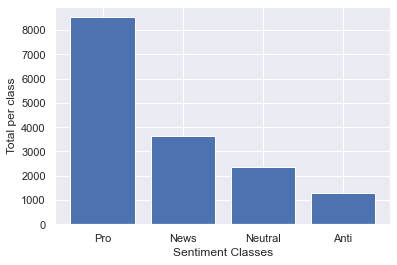

In [78]:
counts = train["sentiment"].value_counts()
plt.bar(range(len(counts)), counts)
plt.xticks([0, 1, 2, 3], ['Pro', 'News', 'Neutral', 'Anti'])

plt.ylabel("Total per class")
plt.xlabel("Sentiment Classes")
plt.show()

In [79]:
#Number of hashtags for each of the class of sentiments

top15 = {}

by_sentiment = train.groupby("Analysis")
for sentiment, group in tqdm(by_sentiment):
    hashtags = group["message"].apply(lambda tweet: re.findall(r"#(\w+)", tweet))
    hashtags = itertools.chain(*hashtags)
    hashtags = [ht.lower() for ht in hashtags]
    
    frequency = nltk.FreqDist(hashtags)
    
    df_hashtags = pd.DataFrame({
        "hashtags": list(frequency.keys()),
        "counts": list(frequency.values()),
    })
    top15_htags = df_hashtags.nlargest(15, columns=["counts"])
    
    top15[sentiment] = top15_htags.reset_index(drop=True)

display(pd.concat(top15, axis=1).head(n=10))

100%|██████████| 4/4 [00:00<00:00, 77.17it/s]


Anti                Neutral                     News         \
         hashtags counts        hashtags counts          hashtags counts   
0            maga     14         climate     19           climate    135   
1         climate     10   climatechange     15     climatechange     65   
2           trump      8           trump     12       environment     47   
3   climatechange      8  beforetheflood      5              news     32   
4   globalwarming      5           qanda      4             trump     25   
5        fakenews      4       amreading      4           science     18   
6    opchemtrails      4           cop22      4                p2     14   
7            tcot      4   globalwarming      3  greatbarrierreef     14   
8  parisagreement      4     parisaccord      3             cop22     14   
9           qanda      3   climatecounts      3    parisagreement      9   

               Pro         
          hashtags counts  
0          climate    188  
1   beforetheflood    148  
2    climatechange    120  
3  imvotingbecause     62  
4            cop22     59  
5   parisagreement     52  
6     actonclimate     49  
7            trump     43  
8                ã     37  
9    globalwarming     35

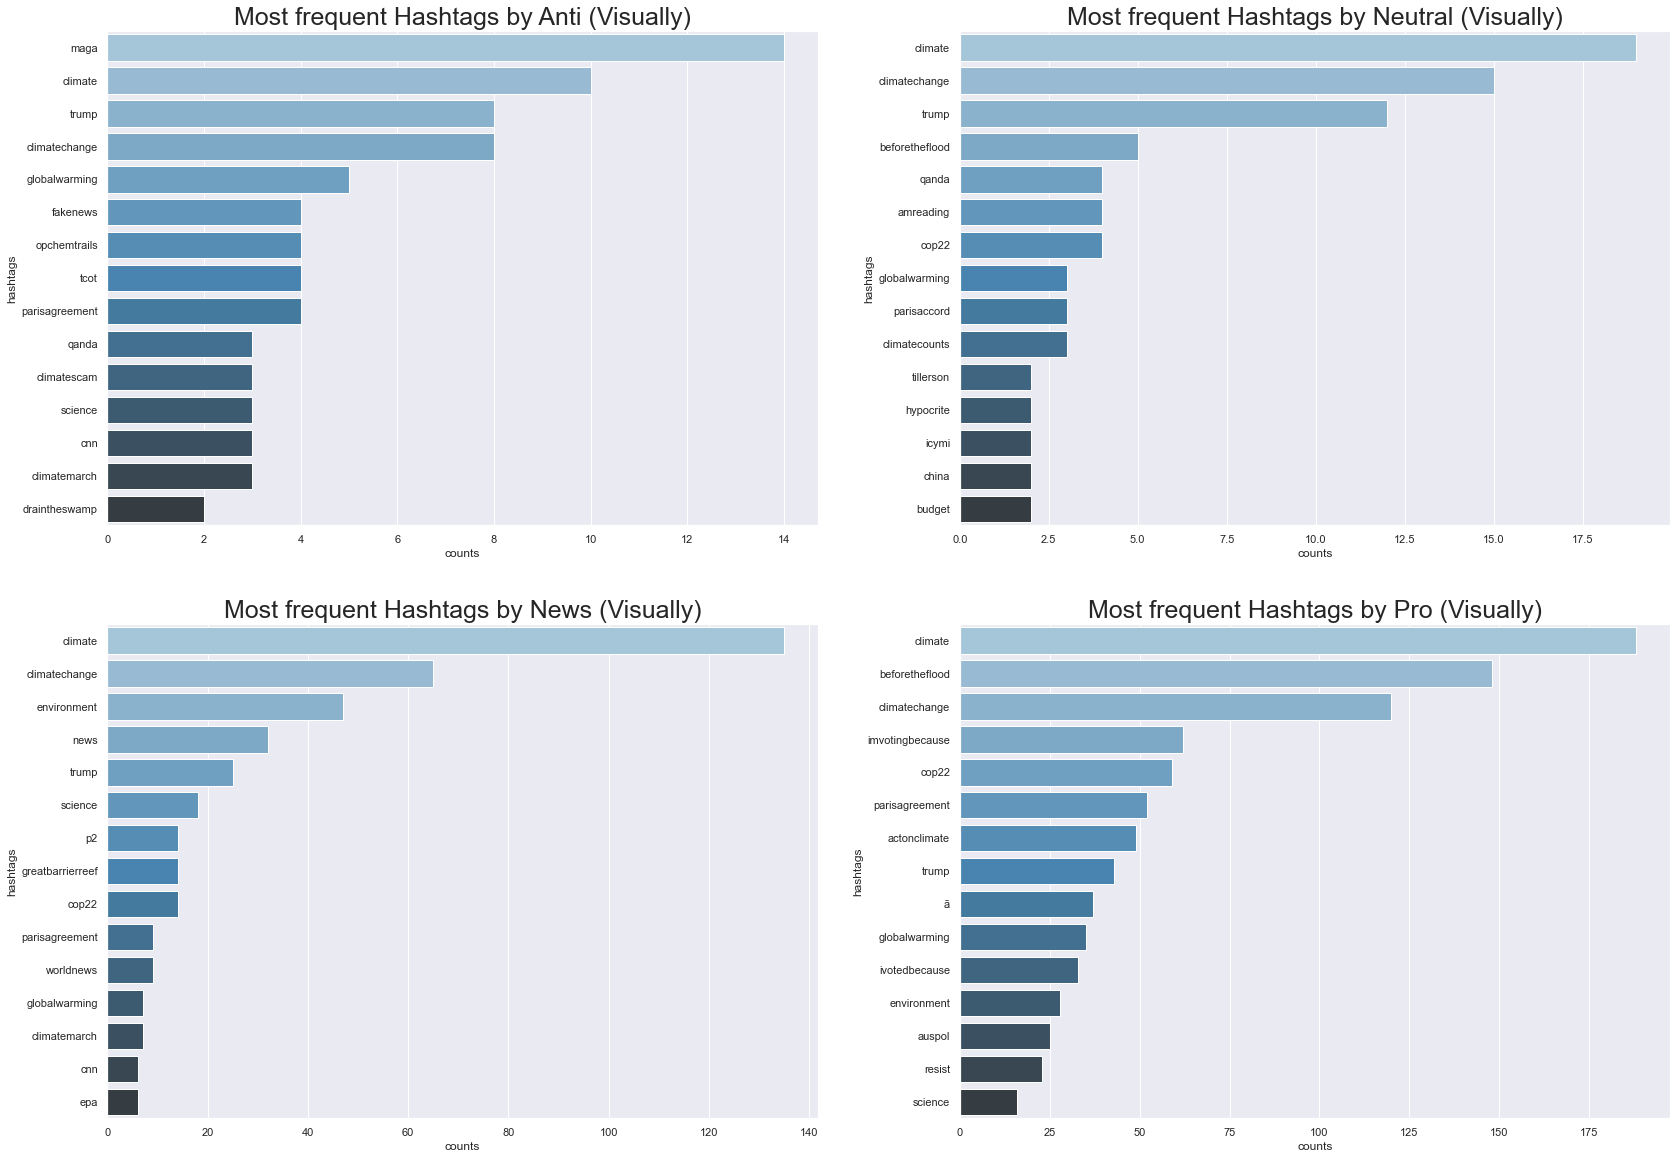

In [80]:
fig, axes = plt.subplots(2, 2, figsize=(28, 20))
counter = 0

for sentiment, top in top15.items():
    sns.barplot(data=top, y="hashtags", x="counts", palette="Blues_d", ax=axes[counter // 2, counter % 2])
    axes[counter // 2, counter % 2].set_title(f"Most frequent Hashtags by {sentiment} (Visually)", fontsize=25)
    counter += 1
plt.show()

In [81]:
# Check for missing values
train.isnull().sum().any(), test.isnull().sum().any() 

(False, False)

The train and test data have no missing values.

In [82]:
# Check for duplicates
train.duplicated().any(), test.duplicated().any()

(False, False)

The train and test data have no duplicated values 

In [83]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
 3   Analysis   15819 non-null  object
dtypes: int64(2), object(2)
memory usage: 494.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10546 entries, 0 to 10545
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  10546 non-null  object
 1   tweetid  10546 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 164.9+ KB


(None, None)

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

# Text Cleaning

Creating array of sentiments and messages

# Noise Removal

- Covert text to lowercase
- Remove emotions, symbols, RT, urls & hyperlinks
- Remove punctuations and excess white-space

In [84]:
def cleaner(tweet):
    tweet = tweet.lower()
    
    tweet = re.sub(r'@[A-Za-z0-9]+', '', tweet) #Remove @mentions
    tweet = re.sub(r':[\s]+', '', tweet)
    tweet = re.sub(r'#', '', tweet) #Remove # symbol
    tweet = re.sub(r'rt[\s]+', '', tweet) #Remove RT
    tweet = re.sub(r'https?:\/\/\S+', '', tweet) #Remove hyper-links
    
    # strip punctuation and special characters
    tweet = re.sub(r"[,.;':@#?!\&/$]+\ *", " ", tweet)
    # strip excess white-space
    tweet = re.sub(r"\s\s+", " ", tweet)
    
    return tweet.lstrip(" ")

In [85]:
train["message"] = train["message"].apply(cleaner)
test["message"] = train["message"].apply(cleaner)
train.head()

,sentiment,message,tweetid,Analysis
0,1,polyscimajor epa chief doesn t think carbon di...,625221,Pro
1,1,it s not like we lack evidence of anthropogeni...,126103,Pro
2,2,researchers say we have three years to act on ...,698562,News
3,1,todayinmaker wired 2016 was a pivotal year in ...,573736,Pro
4,1,it s 2016 and a racist sexist climate change d...,466954,Pro


In [86]:
test.head()

,message,tweetid
0,polyscimajor epa chief doesn t think carbon di...,169760
1,it s not like we lack evidence of anthropogeni...,35326
2,researchers say we have three years to act on ...,224985
3,todayinmaker wired 2016 was a pivotal year in ...,476263
4,it s 2016 and a racist sexist climate change d...,872928


# Tokenization

In [87]:
tokeniser = TreebankWordTokenizer()
train['tokens'] =train['message'].apply(tokeniser.tokenize)
test['tokens'] =train['message'].apply(tokeniser.tokenize)
train['tokens']

0        [polyscimajor, epa, chief, doesn, t, think, ca...
1        [it, s, not, like, we, lack, evidence, of, ant...
2        [researchers, say, we, have, three, years, to,...
3        [todayinmaker, wired, 2016, was, a, pivotal, y...
4        [it, s, 2016, and, a, racist, sexist, climate,...
                               ...                        
15814    [they, took, down, the, material, on, global, ...
15815    [how, climate, change, could, be, breaking, up...
15816    [notivenrtnytimesworld, what, does, trump, act...
15817    [hey, liberals, the, climate, change, crap, is...
15818    [_cannon, s, climate, change, equation, in, 4,...
Name: tokens, Length: 15819, dtype: object

In [88]:
test['tokens']

0        [polyscimajor, epa, chief, doesn, t, think, ca...
1        [it, s, not, like, we, lack, evidence, of, ant...
2        [researchers, say, we, have, three, years, to,...
3        [todayinmaker, wired, 2016, was, a, pivotal, y...
4        [it, s, 2016, and, a, racist, sexist, climate,...
                               ...                        
10541    [ecowas, says, addressing, climate, change, is...
10542    [my, god, he, s, going, to, build, a, wall, pr...
10543    [if, we, don, t, address, climate, change, the...
10544    [i, m, wearing, a, jean, jacket, during, winte...
10545    [you, know, what, im, so, stoked, on, the, fac...
Name: tokens, Length: 10546, dtype: object

# Stemming

In [89]:
stemmer = SnowballStemmer('english')
def train_stemmer(tokens, stemmer):
    return [stemmer.stem(word) for word in tokens]

In [90]:
train['stem'] = train['tokens'].apply(train_stemmer, args=(stemmer, ))
test['stem'] = train['tokens'].apply(train_stemmer, args=(stemmer, ))

In [91]:
train.head()

,sentiment,message,tweetid,Analysis,tokens,stem
0,1,polyscimajor epa chief doesn t think carbon di...,625221,Pro,"[polyscimajor, epa, chief, doesn, t, think, ca...","[polyscimajor, epa, chief, doesn, t, think, ca..."
1,1,it s not like we lack evidence of anthropogeni...,126103,Pro,"[it, s, not, like, we, lack, evidence, of, ant...","[it, s, not, like, we, lack, evid, of, anthrop..."
2,2,researchers say we have three years to act on ...,698562,News,"[researchers, say, we, have, three, years, to,...","[research, say, we, have, three, year, to, act..."
3,1,todayinmaker wired 2016 was a pivotal year in ...,573736,Pro,"[todayinmaker, wired, 2016, was, a, pivotal, y...","[todayinmak, wire, 2016, was, a, pivot, year, ..."
4,1,it s 2016 and a racist sexist climate change d...,466954,Pro,"[it, s, 2016, and, a, racist, sexist, climate,...","[it, s, 2016, and, a, racist, sexist, climat, ..."


In [92]:
test.head()

,message,tweetid,tokens,stem
0,polyscimajor epa chief doesn t think carbon di...,169760,"[polyscimajor, epa, chief, doesn, t, think, ca...","[polyscimajor, epa, chief, doesn, t, think, ca..."
1,it s not like we lack evidence of anthropogeni...,35326,"[it, s, not, like, we, lack, evidence, of, ant...","[it, s, not, like, we, lack, evid, of, anthrop..."
2,researchers say we have three years to act on ...,224985,"[researchers, say, we, have, three, years, to,...","[research, say, we, have, three, year, to, act..."
3,todayinmaker wired 2016 was a pivotal year in ...,476263,"[todayinmaker, wired, 2016, was, a, pivotal, y...","[todayinmak, wire, 2016, was, a, pivot, year, ..."
4,it s 2016 and a racist sexist climate change d...,872928,"[it, s, 2016, and, a, racist, sexist, climate,...","[it, s, 2016, and, a, racist, sexist, climat, ..."


In [93]:
# Create WordNetLemmatizer object
lemmatizer = WordNetLemmatizer()

def train_lemma(tokens, lemmatizer):
    return [lemmatizer.lemmatize(word) for word in tokens]    

In [94]:
train['lemma'] = train['tokens'].apply(train_lemma, args=(lemmatizer, ))
test['lemma'] = test['tokens'].apply(train_lemma, args=(lemmatizer, ))

In [95]:
train.head()

,sentiment,message,tweetid,Analysis,tokens,stem,lemma
0,1,polyscimajor epa chief doesn t think carbon di...,625221,Pro,"[polyscimajor, epa, chief, doesn, t, think, ca...","[polyscimajor, epa, chief, doesn, t, think, ca...","[polyscimajor, epa, chief, doesn, t, think, ca..."
1,1,it s not like we lack evidence of anthropogeni...,126103,Pro,"[it, s, not, like, we, lack, evidence, of, ant...","[it, s, not, like, we, lack, evid, of, anthrop...","[it, s, not, like, we, lack, evidence, of, ant..."
2,2,researchers say we have three years to act on ...,698562,News,"[researchers, say, we, have, three, years, to,...","[research, say, we, have, three, year, to, act...","[researcher, say, we, have, three, year, to, a..."
3,1,todayinmaker wired 2016 was a pivotal year in ...,573736,Pro,"[todayinmaker, wired, 2016, was, a, pivotal, y...","[todayinmak, wire, 2016, was, a, pivot, year, ...","[todayinmaker, wired, 2016, wa, a, pivotal, ye..."
4,1,it s 2016 and a racist sexist climate change d...,466954,Pro,"[it, s, 2016, and, a, racist, sexist, climate,...","[it, s, 2016, and, a, racist, sexist, climat, ...","[it, s, 2016, and, a, racist, sexist, climate,..."


In [96]:
test.head()

,message,tweetid,tokens,stem,lemma
0,polyscimajor epa chief doesn t think carbon di...,169760,"[polyscimajor, epa, chief, doesn, t, think, ca...","[polyscimajor, epa, chief, doesn, t, think, ca...","[polyscimajor, epa, chief, doesn, t, think, ca..."
1,it s not like we lack evidence of anthropogeni...,35326,"[it, s, not, like, we, lack, evidence, of, ant...","[it, s, not, like, we, lack, evid, of, anthrop...","[it, s, not, like, we, lack, evidence, of, ant..."
2,researchers say we have three years to act on ...,224985,"[researchers, say, we, have, three, years, to,...","[research, say, we, have, three, year, to, act...","[researcher, say, we, have, three, year, to, a..."
3,todayinmaker wired 2016 was a pivotal year in ...,476263,"[todayinmaker, wired, 2016, was, a, pivotal, y...","[todayinmak, wire, 2016, was, a, pivot, year, ...","[todayinmaker, wired, 2016, wa, a, pivotal, ye..."
4,it s 2016 and a racist sexist climate change d...,872928,"[it, s, 2016, and, a, racist, sexist, climate,...","[it, s, 2016, and, a, racist, sexist, climat, ...","[it, s, 2016, and, a, racist, sexist, climate,..."


In [97]:
def remove_stop_words(tokens):    
    return [t for t in tokens if t not in stopwords.words('english')]

In [98]:
train['stop_word'] = train['tokens'].apply(remove_stop_words)

In [99]:
test['stop_word'] = test['tokens'].apply(remove_stop_words)

In [100]:
train.head()

,sentiment,message,tweetid,Analysis,tokens,stem,lemma,stop_word
0,1,polyscimajor epa chief doesn t think carbon di...,625221,Pro,"[polyscimajor, epa, chief, doesn, t, think, ca...","[polyscimajor, epa, chief, doesn, t, think, ca...","[polyscimajor, epa, chief, doesn, t, think, ca...","[polyscimajor, epa, chief, think, carbon, diox..."
1,1,it s not like we lack evidence of anthropogeni...,126103,Pro,"[it, s, not, like, we, lack, evidence, of, ant...","[it, s, not, like, we, lack, evid, of, anthrop...","[it, s, not, like, we, lack, evidence, of, ant...","[like, lack, evidence, anthropogenic, global, ..."
2,2,researchers say we have three years to act on ...,698562,News,"[researchers, say, we, have, three, years, to,...","[research, say, we, have, three, year, to, act...","[researcher, say, we, have, three, year, to, a...","[researchers, say, three, years, act, climate,..."
3,1,todayinmaker wired 2016 was a pivotal year in ...,573736,Pro,"[todayinmaker, wired, 2016, was, a, pivotal, y...","[todayinmak, wire, 2016, was, a, pivot, year, ...","[todayinmaker, wired, 2016, wa, a, pivotal, ye...","[todayinmaker, wired, 2016, pivotal, year, war..."
4,1,it s 2016 and a racist sexist climate change d...,466954,Pro,"[it, s, 2016, and, a, racist, sexist, climate,...","[it, s, 2016, and, a, racist, sexist, climat, ...","[it, s, 2016, and, a, racist, sexist, climate,...","[2016, racist, sexist, climate, change, denyin..."


In [120]:
#create a new dataframe with the sentiment and lemma columns
train2=train[['sentiment', 'lemma']]
train2.head()

,sentiment,lemma
0,1,"[polyscimajor, epa, chief, doesn, t, think, ca..."
1,1,"[it, s, not, like, we, lack, evidence, of, ant..."
2,2,"[researcher, say, we, have, three, year, to, a..."
3,1,"[todayinmaker, wired, 2016, wa, a, pivotal, ye..."
4,1,"[it, s, 2016, and, a, racist, sexist, climate,..."


In [121]:
train2['lemma_str'] = [' '.join(map(str,l)) for l in train2['lemma']]
train2.head()

<ipython-input-121-7ae8ce9f115f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train2['lemma_str'] = [' '.join(map(str,l)) for l in train2['lemma']]


,sentiment,lemma,lemma_str
0,1,"[polyscimajor, epa, chief, doesn, t, think, ca...",polyscimajor epa chief doesn t think carbon di...
1,1,"[it, s, not, like, we, lack, evidence, of, ant...",it s not like we lack evidence of anthropogeni...
2,2,"[researcher, say, we, have, three, year, to, a...",researcher say we have three year to act on cl...
3,1,"[todayinmaker, wired, 2016, wa, a, pivotal, ye...",todayinmaker wired 2016 wa a pivotal year in t...
4,1,"[it, s, 2016, and, a, racist, sexist, climate,...",it s 2016 and a racist sexist climate change d...


In [122]:
from sklearn.feature_extraction.text import CountVectorizer

In [138]:
X= train2['lemma_str']
Y= train2['sentiment']

In [139]:
vect = CountVectorizer()
X= vect.fit(train2['lemma_str'])

In [141]:
from sklearn.model_selection import train_test_split

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>